# ASSIGNMENT : IRIS MULTI-CLASS CLASSIFICATION

###### Purpose :
To predict the species of flower .
###### Description :
The dataset contains a set of 150 records under 5 attributes - Petal Length, Petal Width, Sepal Length, Sepal width and Class(Species).
###### Requirements :
1) Code must be in tf 2.0 .

2) Accuracy must be in between 95-97% .

3) Model shouldn't be Overfit (You can add drop out layer for this) .

### STEP 1 : Load all the necessary libraries 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
if tf.__version__ < "2.0.0":
  !pip install --upgrade tensorflow_gpu==2.0
print(tf.__version__)

2.0.0


### STEP 2 : Data Preparation
This step consists of multiple sub steps from data loading [download](https://github.com/ramsha275/PIAIC-Sir-Anees-Quarter-2/blob/master/Deep%20Learning/iris.csv),shuffling ,spliting in **Train** and **Test** sets to one-hot-enconding on labels . 


In [0]:
data_url = "https://github.com/ramsha275/PIAIC-Sir-Anees-Quarter-2/raw/master/Deep%20Learning/iris.csv"
data_file_iris = pd.read_csv(data_url)

In [0]:
sampler = np.random.permutation(150)
shuffled_file_iris = data_file_iris.take(sampler)
train_data = shuffled_file_iris[:120]
test_data = shuffled_file_iris[120:]

In [4]:
column_names = list(data_file_iris.columns)
print(column_names)
features_names = column_names[:-1]
label_name = column_names[-1]
print(features_names)
print(label_name)

['sepal.length', 'sepal.width', 'petal.length', 'petal.width', 'variety']
['sepal.length', 'sepal.width', 'petal.length', 'petal.width']
variety


In [5]:
class_names = data_file_iris['variety'].unique()
print(class_names)

['Setosa' 'Versicolor' 'Virginica']


In [6]:
train_features, train_labels = train_data[features_names], train_data[label_name]
test_features, test_labels = test_data[features_names], test_data[label_name]
print(train_features)
print(train_labels)
print(test_features)
print(test_labels)

     sepal.length  sepal.width  petal.length  petal.width
60            5.0          2.0           3.5          1.0
1             4.9          3.0           1.4          0.2
71            6.1          2.8           4.0          1.3
12            4.8          3.0           1.4          0.1
21            5.1          3.7           1.5          0.4
..            ...          ...           ...          ...
121           5.6          2.8           4.9          2.0
92            5.8          2.6           4.0          1.2
37            4.9          3.6           1.4          0.1
59            5.2          2.7           3.9          1.4
109           7.2          3.6           6.1          2.5

[120 rows x 4 columns]
60     Versicolor
1          Setosa
71     Versicolor
12         Setosa
21         Setosa
          ...    
121     Virginica
92     Versicolor
37         Setosa
59     Versicolor
109     Virginica
Name: variety, Length: 120, dtype: object
     sepal.length  sepal.width  petal.le

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# Label encode Class (Species)
encoder = LabelEncoder()
new_label = encoder.fit_transform(class_names)
print(new_label)
# One Hot Encodeone
onehot_encoder = OneHotEncoder(sparse=False)
new_label = new_label.reshape(len(new_label), 1)
onehot_encoded = onehot_encoder.fit_transform(new_label)
print(onehot_encoded)

[0 1 2]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


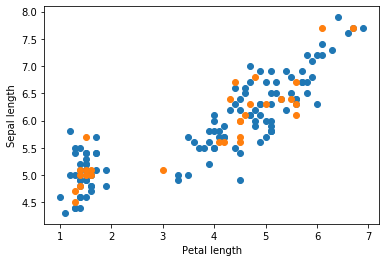

In [8]:
# plt.plot(features['petal.length'], features['sepal.length'])
plt.scatter(train_features['petal.length'],
            train_features['sepal.length'],
            cmap='viridis')
plt.scatter(test_features['petal.length'],
            test_features['sepal.length'],
            cmap='viridis')
plt.xlabel("Petal length")
plt.ylabel("Sepal length")
plt.show()

### STEP 3 : Model Architecture 


###### Input : 4 
###### 1 hidden Layer : 8 nodes
###### Output : 3

In [0]:
network = tf.keras.models.Sequential()
network.add(tf.keras.layers.Dense(8, activation = 'relu', input_dim = 4))    # Input Layer
network.add(tf.keras.layers.Dense(8, activation = 'relu'))    # Hidden Layer
network.add(tf.keras.layers.Dropout(0.1))    # Dropout Layer
network.add(tf.keras.layers.Dense(3, activation = 'softmax'))    # Output Layer

 ### STEP 4 : Compilation Step 

In [0]:
network.compile(loss='sparse_categorical_crossentropy', 
                optimizer='adam', 
                metrics=['accuracy'])

### STEP 5 : Evaluation 

In [17]:
target_labels = train_labels.replace(class_names, new_label)
network.fit(train_features, target_labels, epochs=100)
test_target_labels = test_labels.replace(class_names, new_label)
test_loss, test_accuracy = network.evaluate(test_features, test_target_labels)
print("Accuracy :", test_accuracy)
print("Losses :", test_loss)

Train on 120 samples
Epoch 1/100
120/120 [==============================] - 0s 635us/sample - loss: 2.5296 - accuracy: 0.2833
Epoch 2/100
120/120 [==============================] - 0s 64us/sample - loss: 2.2427 - accuracy: 0.3250
Epoch 3/100
120/120 [==============================] - 0s 62us/sample - loss: 1.9679 - accuracy: 0.3500
Epoch 4/100
120/120 [==============================] - 0s 68us/sample - loss: 1.6863 - accuracy: 0.3750
Epoch 5/100
120/120 [==============================] - 0s 66us/sample - loss: 1.5056 - accuracy: 0.3417
Epoch 6/100
120/120 [==============================] - 0s 64us/sample - loss: 1.5244 - accuracy: 0.3417
Epoch 7/100
120/120 [==============================] - 0s 65us/sample - loss: 1.2999 - accuracy: 0.3333
Epoch 8/100
120/120 [==============================] - 0s 68us/sample - loss: 1.1583 - accuracy: 0.3750
Epoch 9/100
120/120 [==============================] - 0s 72us/sample - loss: 1.0753 - accuracy: 0.4083
Epoch 10/100
120/120 [====================

### STEP 6 : Prediction 

In [18]:
predictions = network.predict(test_features)
i = 0
for values in predictions:
  i += 1
  print("Predictions {}".format(i))
  print(f"{class_names[0]} : {values[0] * 100.0}%")
  print(f"{class_names[1]} : {values[1] * 100.0}%")
  print(f"{class_names[2]} : {values[2] * 100.0}%")

Predictions 1
Setosa : 84.37005877494812%
Versicolor : 14.56388384103775%
Virginica : 1.0660508647561073%
Predictions 2
Setosa : 5.938209220767021%
Versicolor : 44.08280551433563%
Virginica : 49.97898042201996%
Predictions 3
Setosa : 86.4290714263916%
Versicolor : 12.958478927612305%
Virginica : 0.6124514155089855%
Predictions 4
Setosa : 0.6319213658571243%
Versicolor : 24.911074340343475%
Virginica : 74.45700764656067%
Predictions 5
Setosa : 26.454192399978638%
Versicolor : 49.852538108825684%
Virginica : 23.693260550498962%
Predictions 6
Setosa : 2.1675098687410355%
Versicolor : 33.42971205711365%
Virginica : 64.40277695655823%
Predictions 7
Setosa : 81.53175115585327%
Versicolor : 16.94646030664444%
Virginica : 1.5217862091958523%
Predictions 8
Setosa : 1.6633657738566399%
Versicolor : 30.372995138168335%
Virginica : 67.96364188194275%
Predictions 9
Setosa : 6.33886530995369%
Versicolor : 46.76213264465332%
Virginica : 46.89900279045105%
Predictions 10
Setosa : 8.783406764268875%
Ve

In [29]:
predict_value = 6
print("Predictions")
print(f"{class_names[0]} : {predictions[predict_value][0] * 100.0}%")
print(f"{class_names[1]} : {predictions[predict_value][1] * 100.0}%")
print(f"{class_names[2]} : {predictions[predict_value][2] * 100.0}%")
def predict_ans(x, y):
  if (x[0] > x[1]) & (x[0] > x[2]):
    result = y[0]
  elif (x[1] > x[0]) & (x[1] > x[2]):
    result = y[1]
  else:
    result = y[2]
  return result
print("\nPredicted Answer")
print(predict_ans(predictions[predict_value], class_names))
print("\nActual Answer")
print(f"{test_labels.iloc[predict_value]}")

Predictions
Setosa : 81.53175115585327%
Versicolor : 16.94646030664444%
Virginica : 1.5217862091958523%

Predicted Answer
Setosa

Actual Answer
Setosa
